**Problem Statement**

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 12 marks
1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (5 Marks)
2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 5 marks
1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

Modelling: 28 marks
1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)
3. Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (9 marks)
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks
1. Based on these predictions, what are the insights? (5 marks)

Important Note: Please reflect on all that you have learned while working on this project. This step is critical in cementing all your concepts and closing the loop. Please write down your thoughts here.

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


# Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (5 Marks)

In [120]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
# read the excel file

sheets = pd.read_excel('Election_Data.xlsx', sheet_name=None)

ERROR! Session/line number was not unique in database. History logging moved to new session 114


In [122]:
# import dataset

df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [123]:
df.shape

(1525, 10)

In [124]:
# check information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [125]:
df.duplicated().sum()

0

In [126]:
# check data description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [127]:
df.describe(include='object')

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [128]:
# Check the dimensions of Dataset

print('Dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataset has 1525 rows and 10 columns


In [129]:
# Check if there are any duplicated enetries in the dataset

print('The dataset has {} duplicate entries'.format(df.duplicated().sum()))

The dataset has 0 duplicate entries


In [130]:
# Check the information of each column/variable like no of not-null values and datatype of each variable

print('There are {} null values in the dataset as all the columns have {} non-null count.\
\n\nThere are {} columns with following datatypes :\n{}\n\n'.
      format(df.isnull().sum().sum(),df.shape[0],len(df.columns),df.dtypes.value_counts()))

There are 0 null values in the dataset as all the columns have 1525 non-null count.

There are 10 columns with following datatypes :
int64     8
object    2
dtype: int64




In [131]:
#Checking information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [132]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [133]:
# Check the object columns and relate for the types of values and counts 

for col in (df.select_dtypes(['object'])).columns:
    print('Column {} has {} unique values:\n{}'.format(col,len(df[col].unique()),df[col].value_counts(dropna=False)))
    print('===========================================================\n')

Column vote has 2 unique values:
Labour          1063
Conservative     462
Name: vote, dtype: int64

Column gender has 2 unique values:
female    812
male      713
Name: gender, dtype: int64



In [134]:
# check five-point summary

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [135]:
df.describe(include='object').transpose()

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


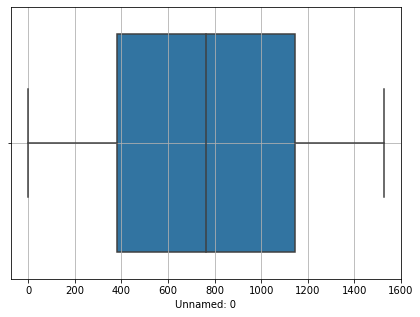

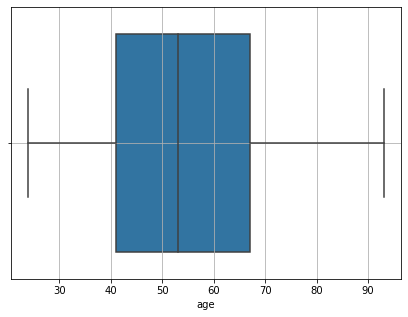

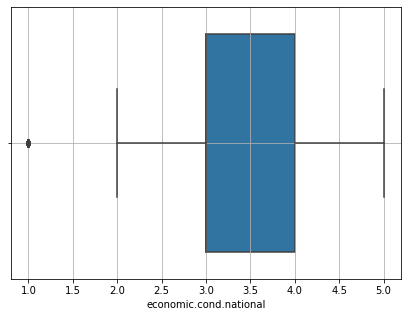

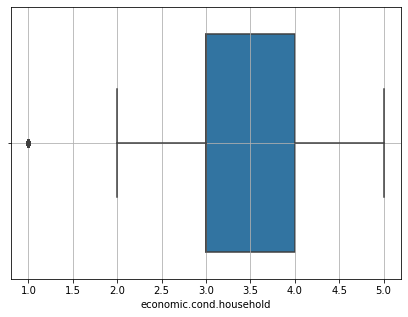

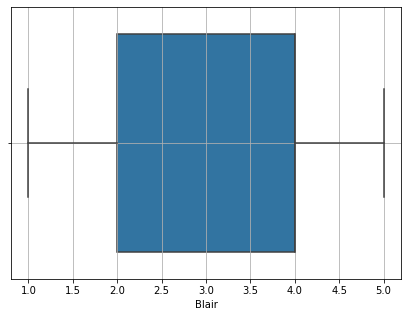

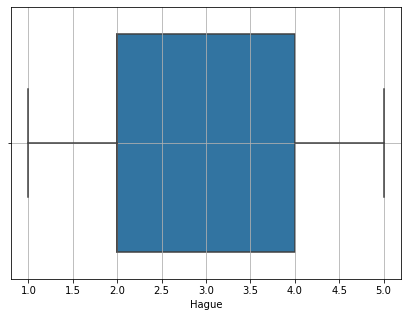

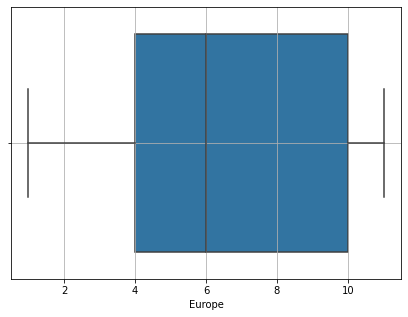

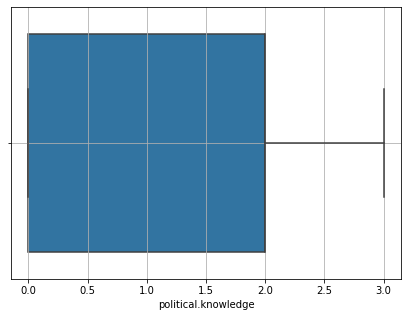

In [138]:
for i in df.columns: 
    if df[i].dtype == 'int64': 
        plt.rcParams['figure.figsize'] = 7,5
        sns.boxplot(df[i],whis=1.5)
        plt.grid()
        plt.show();

# Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

In [140]:
df = df.drop('Unnamed: 0', axis=1) 

Text(1.0, 1.0, 'Distplot all')

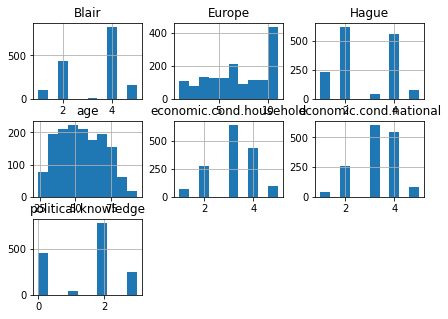

In [141]:
# Univariate analysis

histo1 = df.hist()
plt.title("Distplot all", fontsize='15', loc='right')

In [142]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

Text(0.5, 1.0, 'Histogram Age')

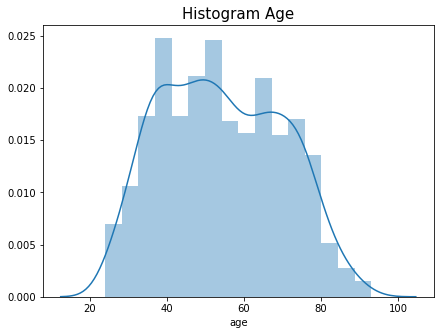

In [143]:
sns.distplot(df['age'])
plt.title("Histogram Age", fontsize='15')

Text(0.5, 1.0, 'Boxplot All Variables')

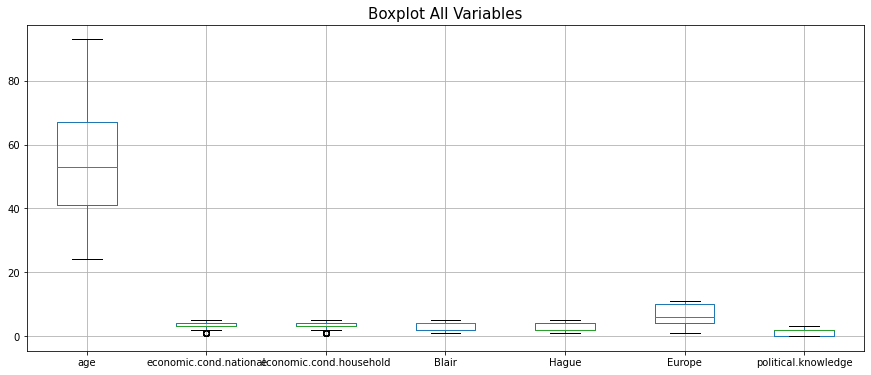

In [144]:
# checking outliers

plt.figure(figsize=(15,6))
df.boxplot()
plt.title("Boxplot All Variables", fontsize='15')

In [145]:
df['economic.cond.household'].value_counts(normalize=True)

3    0.424918
4    0.288525
2    0.183607
5    0.060328
1    0.042623
Name: economic.cond.household, dtype: float64

In [146]:
df['economic.cond.national'].value_counts(normalize=True)

3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: economic.cond.national, dtype: float64

There are outliers in two columns economic cond national and household, but we would not treat/remove them as:


    1.These are categorical variables by nature and in as a part of survey all categories are important.
    2.There numbers is very small (2% to 4% of the data) so they might not affect the overall predictions
    3.The techniques we will use for the predictions are robust to outliers.

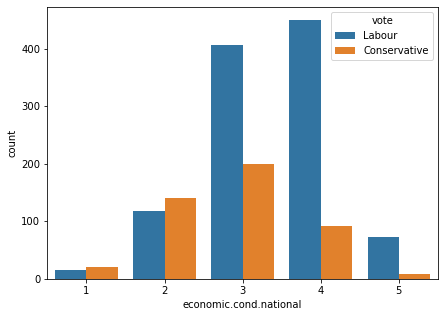

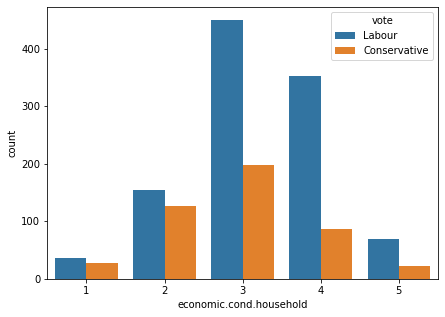

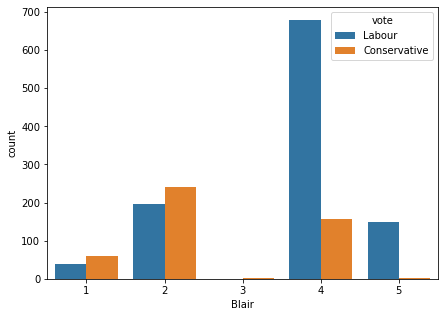

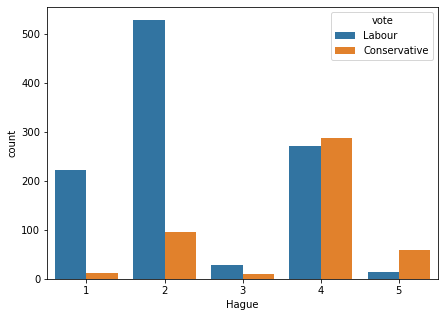

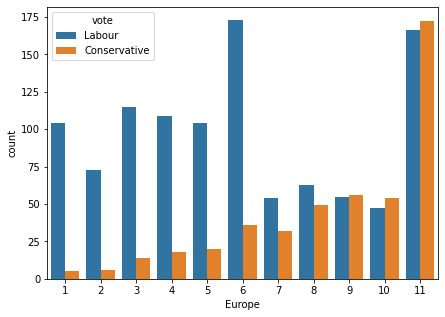

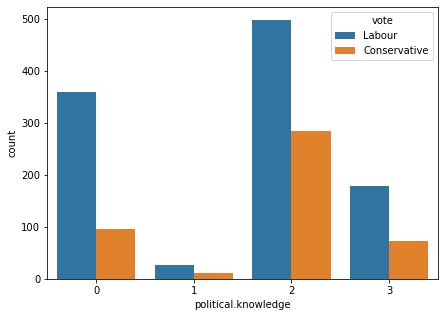

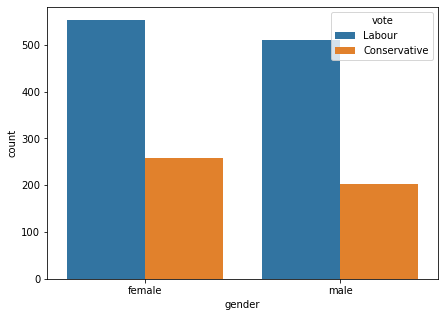

In [147]:
# bivariate analysis

for i in df.drop(['age','vote'], axis=1).columns:
    sns.countplot(x=df[i],hue=df['vote'])
    plt.show()

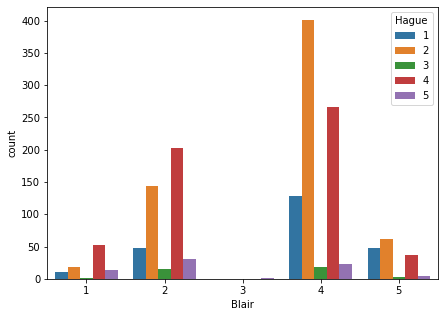

In [148]:
sns.countplot('Blair', data=df, hue='Hague')

# Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

In [149]:
# transform 'vote' variable to int type by label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['vote']= le.fit_transform(df['vote'])
df.vote.value_counts(normalize=True)

1    0.697049
0    0.302951
Name: vote, dtype: float64

In [150]:
# transform 'gender' variable to int type by label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender']= le.fit_transform(df['gender'])
df.gender.value_counts()

0    812
1    713
Name: gender, dtype: int64

In [151]:
df2 = df.rename(columns = {'economic.cond.national': 'economic_cond_national', 'economic.cond.household': 'economic_cond_household','political.knowledge': 'political_knowledge'}, inplace = False)

Although all columns are single digit except Age and Europe which are also only in double digits, we may use the data without scaling. However, for our safety we wil scale the data before using it.

In [305]:

# split data into test train in 70:30

from sklearn.model_selection import train_test_split
Train,Test = train_test_split(df2,test_size=0.3,random_state=1,stratify=df2['vote'])

X_train= Train.drop('vote',axis=1)
X_test= Test.drop('vote',axis=1)
y_train = Train['vote']
y_test= Test['vote']
# scaling train and test

from sklearn.preprocessing import StandardScaler
features_train=X_train
features_test=X_test
scale = StandardScaler()
#X_train = scale.fit_transform(X_train)       # scaling original train data
#X_test = scale.transform(X_test)             # scale original test data
features_train[ : ]= scale.fit_transform(features_train.values)
features_test[ : ]= scale.fit_transform(features_test.values)

In [306]:
Train.shape

(1067, 9)

In [307]:
Test.shape

(458, 9)

# Apply Logistic Regression 
# Logistic Regression 

In [308]:
import statsmodels.api as sm

In [309]:
formula_1='vote~age+economic_cond_national+economic_cond_household+Blair+Hague+Europe+political_knowledge+gender'

In [310]:
Logistic_1 = sm.Logit(y_train,features_train).fit()

Optimization terminated successfully.
         Current function value: 0.508113
         Iterations 6


In [311]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1067
Model:                          Logit   Df Residuals:                     1059
Method:                           MLE   Df Model:                            7
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.1713
Time:                        16:05:43   Log-Likelihood:                -542.16
converged:                       True   LL-Null:                       -654.23
Covariance Type:            nonrobust   LLR p-value:                 8.681e-45
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.2808      0.077     -3.651      0.000      -0.432      -0.130
economic_cond_national      0.2271      0.085      2.667      0.008       0.060       0.394
economic_cond_household     0.0683      0.081      0.841      0.400      -0.091       0.228
Blair                       0.5717      0.083      6.918      0.000       0.410       0.734
Hague                      -0.8238      0.079    -10.362      0.000      -0.980      -0.668
Europe                     -0.5505      0.080     -6.883      0.000      -0.707      -0.394
political_knowledge        -0.3675      0.077     -4.745      0.000      -0.519      -0.216
gender                      0.0497      0.077      0.647      0.518      -0.101       0.200
===========================================================================================
"""

In [312]:
Logistic_1.pvalues

age                        2.609021e-04
economic_cond_national     7.654228e-03
economic_cond_household    4.004806e-01
Blair                      4.570417e-12
Hague                      3.674663e-25
Europe                     5.851016e-12
political_knowledge        2.082527e-06
gender                     5.175689e-01
dtype: float64

In [313]:
from sklearn import metrics

In [314]:
model_1_train_class = Logistic_1.predict(features_train[['age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge','gender']])
model_1_test_class = Logistic_1.predict(features_test[['age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge','gender']])

In [315]:
model_1_train_class = Logistic_1.predict(features_train)
model_1_test_class = Logistic_1.predict(features_test)

In [316]:
model_1_train_class=(model_1_train_class>=0.5).astype(np.int)
model_1_train_class

1493    1
1431    1
235     1
1078    1
735     1
       ..
531     0
624     0
515     1
545     0
406     0
Length: 1067, dtype: int32

In [317]:
model_1_test_class=(model_1_test_class>=0.5).astype(np.int)
model_1_test_class

1317    1
229     1
609     1
24      0
1479    1
       ..
1287    0
780     1
636     1
664     0
265     1
Length: 458, dtype: int32

In [318]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

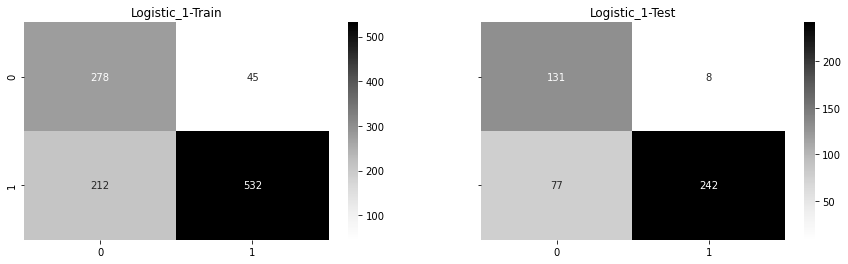

In [319]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_1_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic_1-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic_1-Test');



In [320]:
print('Logistic_1-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_1_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic_1-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_1-Train
True Negative: 278 
False Positives: 45 
False Negatives: 212 
True Positives: 532 


Logistic_1-Test
True Negative: 131 
False Positives: 8 
False Negatives: 77 
True Positives: 242 




In [321]:
print('Logistic_1-Train')
print(metrics.classification_report(y_train,model_1_train_class),'\n')

print('Logistic_1-Test')
print(metrics.classification_report(y_test,model_1_test_class),'\n')

Logistic_1-Train
              precision    recall  f1-score   support

           0       0.57      0.86      0.68       323
           1       0.92      0.72      0.81       744

    accuracy                           0.76      1067
   macro avg       0.74      0.79      0.74      1067
weighted avg       0.81      0.76      0.77      1067
 

Logistic_1-Test
              precision    recall  f1-score   support

           0       0.63      0.94      0.76       139
           1       0.97      0.76      0.85       319

    accuracy                           0.81       458
   macro avg       0.80      0.85      0.80       458
weighted avg       0.87      0.81      0.82       458
 



In [322]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

Logistic_1-Train AUC: 0.87602


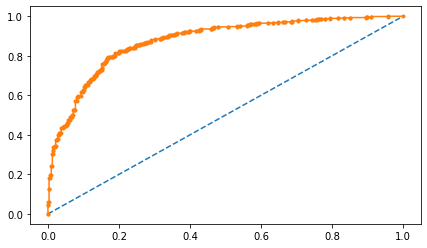

Logistic_1-Test AUC: 0.91669


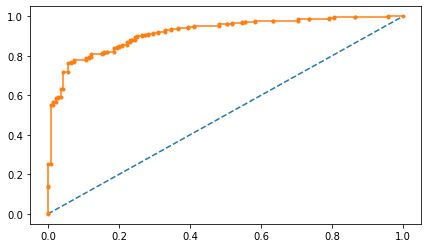

In [323]:
# AUC and ROC for the model 1

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic_1.predict(features_train))#keeping only the probabilities for the desired class outcome
print('Logistic_1-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic_1.predict(features_train))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic_1.predict(features_test))#keeping only the probabilities for the desired class outcome
print('Logistic_1-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic_1.predict(features_test))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Iteration 2 - dropping 'gender'

In [324]:
formula_2='vote~age+economic_cond_national+Blair+Hague+Europe+political_knowledge+economic_cond_household'

In [325]:
features_train=features_train.drop('gender',axis=1)
features_test=features_test.drop('gender',axis=1)

In [326]:
features_test.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
1317,-1.458270,-0.28905,0.915288,0.585700,1.085189,0.631103,-1.431395
229,0.841487,-1.45032,-0.154105,1.431916,-0.520680,0.334037,-1.431395
609,1.863601,0.87222,-1.223498,0.585700,-1.323615,-0.854227,1.319286
24,0.330430,-0.28905,-1.223498,0.585700,1.085189,-1.448359,0.402392
1479,1.544190,0.87222,0.915288,1.431916,-1.323615,-1.151293,1.319286


In [327]:
Logistic_2 = sm.Logit(y_train,features_train).fit()

Optimization terminated successfully.
         Current function value: 0.508309
         Iterations 6


In [329]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1067
Model:                          Logit   Df Residuals:                     1060
Method:                           MLE   Df Model:                            6
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.1710
Time:                        16:06:39   Log-Likelihood:                -542.37
converged:                       True   LL-Null:                       -654.23
Covariance Type:            nonrobust   LLR p-value:                 1.666e-45
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.2805      0.077     -3.650      0.000      -0.431      -0.130
economic_cond_national      0.2292      0.085      2.694      0.007       0.062       0.396
economic_cond_household     0.0690      0.081      0.849      0.396      -0.090       0.228
Blair                       0.5760      0.082      6.990      0.000       0.414       0.737
Hague                      -0.8242      0.080    -10.366      0.000      -0.980      -0.668
Europe                     -0.5522      0.080     -6.906      0.000      -0.709      -0.395
political_knowledge        -0.3580      0.076     -4.710      0.000      -0.507      -0.209
===========================================================================================
"""

In [332]:
model_2_train_class = Logistic_2.predict(features_train[['age','economic_cond_national','Blair','Hague','Europe','political_knowledge','economic_cond_household']])
model_2_train_class = Logistic_2.predict(features_test[['age','economic_cond_national','Blair','Hague','Europe','political_knowledge','economic_cond_household']])

In [333]:
model_2_train_class = Logistic_2.predict(features_train)
model_2_test_class = Logistic_2.predict(features_test)

In [334]:
model_2_train_class=(model_2_train_class>=0.5).astype(np.int)
model_2_train_class

1493    1
1431    1
235     1
1078    1
735     1
       ..
531     0
624     0
515     1
545     0
406     0
Length: 1067, dtype: int32

In [335]:
model_2_test_class=(model_2_test_class>=0.5).astype(np.int)
model_2_test_class

1317    1
229     1
609     1
24      0
1479    1
       ..
1287    0
780     1
636     1
664     0
265     0
Length: 458, dtype: int32

In [336]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

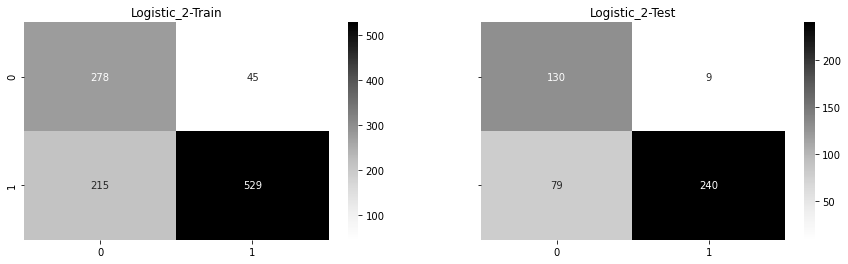

In [337]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_2_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic_2-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic_2-Test');



In [338]:
print('Logistic_2-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_2_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic_2-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_2-Train
True Negative: 278 
False Positives: 45 
False Negatives: 215 
True Positives: 529 


Logistic_2-Test
True Negative: 130 
False Positives: 9 
False Negatives: 79 
True Positives: 240 




In [339]:
print('Logistic_2-Train')
print(metrics.classification_report(y_train,model_2_train_class),'\n')

print('Logistic_2-Test')
print(metrics.classification_report(y_test,model_2_test_class),'\n')

Logistic_2-Train
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       323
           1       0.92      0.71      0.80       744

    accuracy                           0.76      1067
   macro avg       0.74      0.79      0.74      1067
weighted avg       0.81      0.76      0.77      1067
 

Logistic_2-Test
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       139
           1       0.96      0.75      0.85       319

    accuracy                           0.81       458
   macro avg       0.79      0.84      0.80       458
weighted avg       0.86      0.81      0.82       458
 



In [208]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

Logistic_2-Train AUC: 0.87604


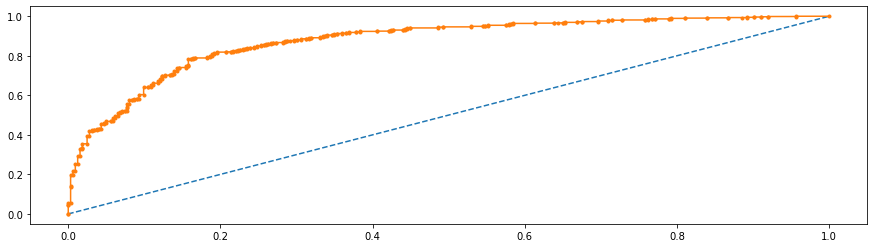

Logistic_2-Test AUC: 0.91764


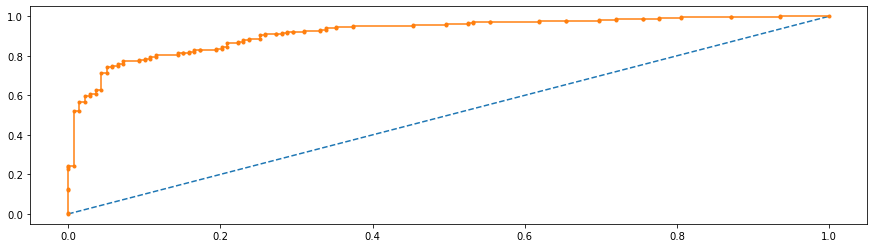

In [340]:
# AUC and ROC for the model 1

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic_2.predict(features_train))#keeping only the probabilities for the desired class outcome
print('Logistic_2-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic_2.predict(features_train))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic_2.predict(features_test))#keeping only the probabilities for the desired class outcome
print('Logistic_2-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic_2.predict(features_test))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Iteration 3 - dropping 'economic_cond_household'

In [341]:
formula_3='vote~age+economic_cond_national+Blair+Hague+Europe+political_knowledge'

In [342]:
features_train=features_train.drop('economic_cond_household',axis=1)
features_test=features_test.drop('economic_cond_household',axis=1)

In [343]:
Logistic_3 = sm.Logit(y_train,features_train).fit()

Optimization terminated successfully.
         Current function value: 0.508647
         Iterations 6


In [344]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1067
Model:                          Logit   Df Residuals:                     1061
Method:                           MLE   Df Model:                            5
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.1704
Time:                        16:10:33   Log-Likelihood:                -542.73
converged:                       True   LL-Null:                       -654.23
Covariance Type:            nonrobust   LLR p-value:                 3.367e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                       -0.2855      0.077     -3.727      0.000      -0.436      -0.135
economic_cond_national     0.2534      0.080      3.161      0.002       0.096       0.411
Blair                      0.5849      0.082      7.158      0.000       0.425       0.745
Hague                     -0.8224      0.079    -10.361      0.000      -0.978      -0.667
Europe                    -0.5541      0.080     -6.934      0.000      -0.711      -0.397
political_knowledge       -0.3569      0.076     -4.699      0.000      -0.506      -0.208
==========================================================================================
"""

In [345]:
model_3_train_class = Logistic_3.predict(features_train[['age','economic_cond_national','Blair','Hague','Europe','political_knowledge']])
model_3_test_class = Logistic_3.predict(features_test[['age','economic_cond_national','Blair','Hague','Europe','political_knowledge']])

In [346]:
model_3_train_class = Logistic_3.predict(features_train)
model_3_test_class = Logistic_3.predict(features_test)

In [347]:
model_3_train_class=(model_3_train_class>=0.5).astype(np.int)
model_3_train_class

1493    1
1431    1
235     1
1078    1
735     1
       ..
531     0
624     0
515     1
545     0
406     0
Length: 1067, dtype: int32

In [348]:
model_3_test_class=(model_3_test_class>=0.5).astype(np.int)
model_3_test_class

1317    0
229     1
609     1
24      0
1479    1
       ..
1287    0
780     1
636     1
664     0
265     0
Length: 458, dtype: int32

In [349]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

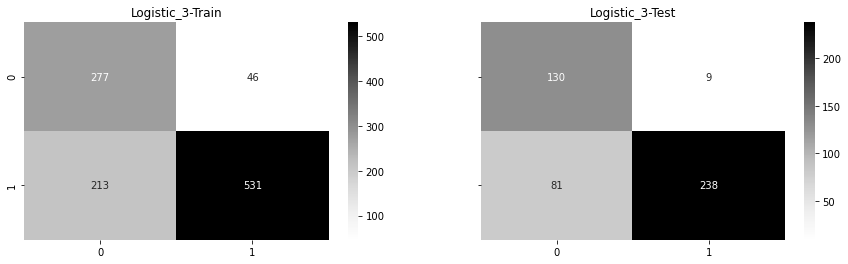

In [350]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the models for the Training and Testing Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,model_3_train_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Logistic_3-Train')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Logistic_3-Test');



In [351]:
print('Logistic_3-Train')
tn, fp, fn, tp = metrics.confusion_matrix(y_train,model_3_train_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Logistic_3-Test')
tn, fp, fn, tp = metrics.confusion_matrix(y_test,model_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Logistic_3-Train
True Negative: 277 
False Positives: 46 
False Negatives: 213 
True Positives: 531 


Logistic_3-Test
True Negative: 130 
False Positives: 9 
False Negatives: 81 
True Positives: 238 




In [352]:
print('Logistic_3-Train')
print(metrics.classification_report(y_train,model_3_train_class),'\n')

print('Logistic_3-Test')
print(metrics.classification_report(y_test,model_3_test_class),'\n')

Logistic_3-Train
              precision    recall  f1-score   support

           0       0.57      0.86      0.68       323
           1       0.92      0.71      0.80       744

    accuracy                           0.76      1067
   macro avg       0.74      0.79      0.74      1067
weighted avg       0.81      0.76      0.77      1067
 

Logistic_3-Test
              precision    recall  f1-score   support

           0       0.62      0.94      0.74       139
           1       0.96      0.75      0.84       319

    accuracy                           0.80       458
   macro avg       0.79      0.84      0.79       458
weighted avg       0.86      0.80      0.81       458
 



In [353]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

Logistic_2-Train AUC: 0.87570


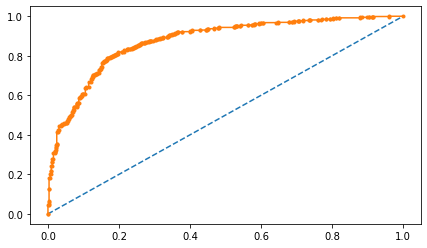

Logistic_2-Test AUC: 0.91713


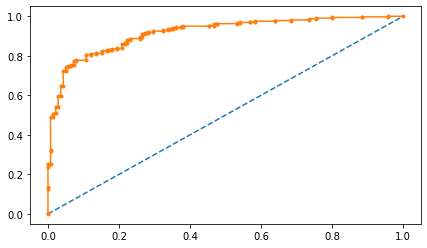

In [354]:
# AUC and ROC for the model 1

# calculate AUC
auc = metrics.roc_auc_score(y_train,Logistic_3.predict(features_train))#keeping only the probabilities for the desired class outcome
print('Logistic_2-Train AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,Logistic_3.predict(features_train))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# calculate AUC
auc = metrics.roc_auc_score(y_test,Logistic_3.predict(features_test))#keeping only the probabilities for the desired class outcome
print('Logistic_2-Test AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,Logistic_3.predict(features_test))#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()